<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [6]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -1387
Episode 2: total reward = -1486
Episode 3: total reward = -694
Episode 4: total reward = -1189
Episode 5: total reward = -793


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [11]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9

# SARSA-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q): # Not used here, but used in Q-learning
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0


    action = epsilon_greedy_action(state, Q, epsilon,  env)



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            next_action = epsilon_greedy_action(next_state, Q, epsilon,  env)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action


    print(f"Episode {episode+1}: total reward = {total_reward}")


Episode 1: total reward = -694
Episode 2: total reward = -397
Episode 3: total reward = -1783
Episode 4: total reward = -793
Episode 5: total reward = -694
Episode 6: total reward = -892
Episode 7: total reward = -694
Episode 8: total reward = -595
Episode 9: total reward = -1189
Episode 10: total reward = -694
Episode 11: total reward = -298
Episode 12: total reward = -298
Episode 13: total reward = -1189
Episode 14: total reward = -298
Episode 15: total reward = -397
Episode 16: total reward = -397
Episode 17: total reward = -1189
Episode 18: total reward = -1486
Episode 19: total reward = -793
Episode 20: total reward = -1486
Episode 21: total reward = -298
Episode 22: total reward = -793
Episode 23: total reward = -892
Episode 24: total reward = -694
Episode 25: total reward = -1090
Episode 26: total reward = -397
Episode 27: total reward = -1684
Episode 28: total reward = -496
Episode 29: total reward = -397
Episode 30: total reward = -397
Episode 31: total reward = -892
Episode 3

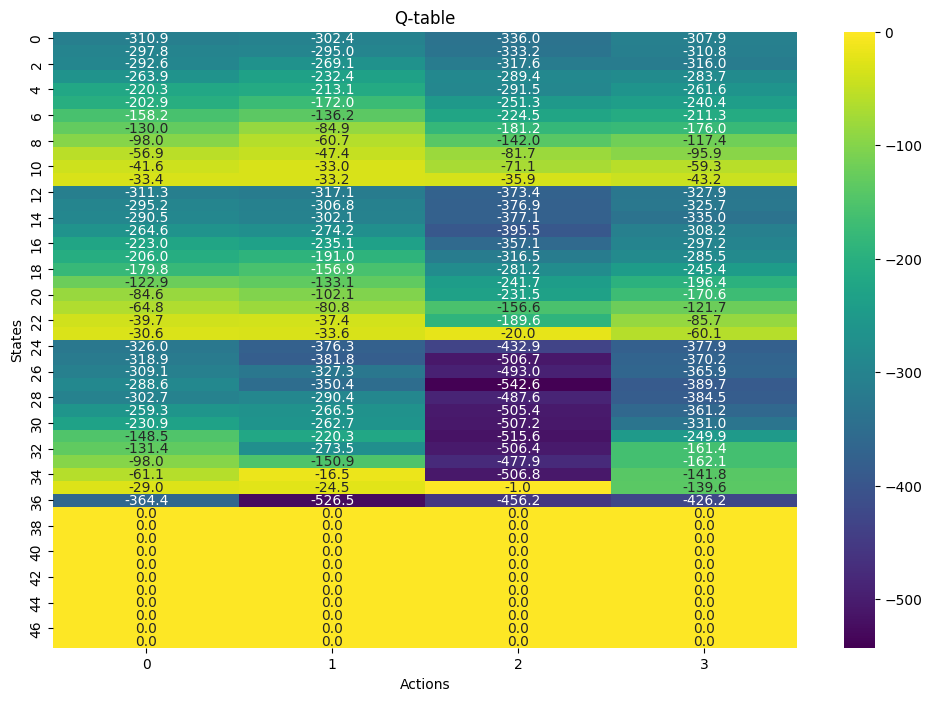

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

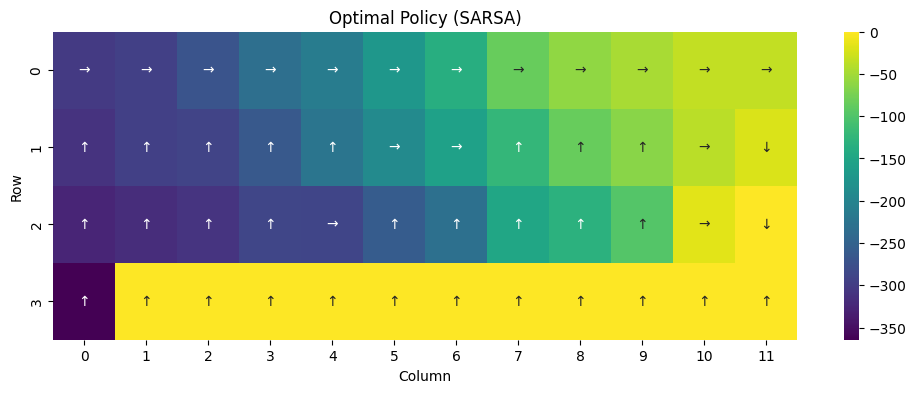

In [13]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [14]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q):
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        action = epsilon_greedy_action(state, Q, epsilon,  env)

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = greedy_action(next_state, Q)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    print(f"Episode {episode+1}: total reward = {total_reward}")


Episode 1: total reward = -298
Episode 2: total reward = -397
Episode 3: total reward = -199
Episode 4: total reward = -298
Episode 5: total reward = -100
Episode 6: total reward = -47
Episode 7: total reward = -84
Episode 8: total reward = -199
Episode 9: total reward = -397
Episode 10: total reward = -100
Episode 11: total reward = -298
Episode 12: total reward = -199
Episode 13: total reward = -199
Episode 14: total reward = -199
Episode 15: total reward = -199
Episode 16: total reward = -100
Episode 17: total reward = -94
Episode 18: total reward = -100
Episode 19: total reward = -199
Episode 20: total reward = -199
Episode 21: total reward = -298
Episode 22: total reward = -183
Episode 23: total reward = -298
Episode 24: total reward = -98
Episode 25: total reward = -100
Episode 26: total reward = -77
Episode 27: total reward = -397
Episode 28: total reward = -100
Episode 29: total reward = -148
Episode 30: total reward = -198
Episode 31: total reward = -100
Episode 32: total rewa

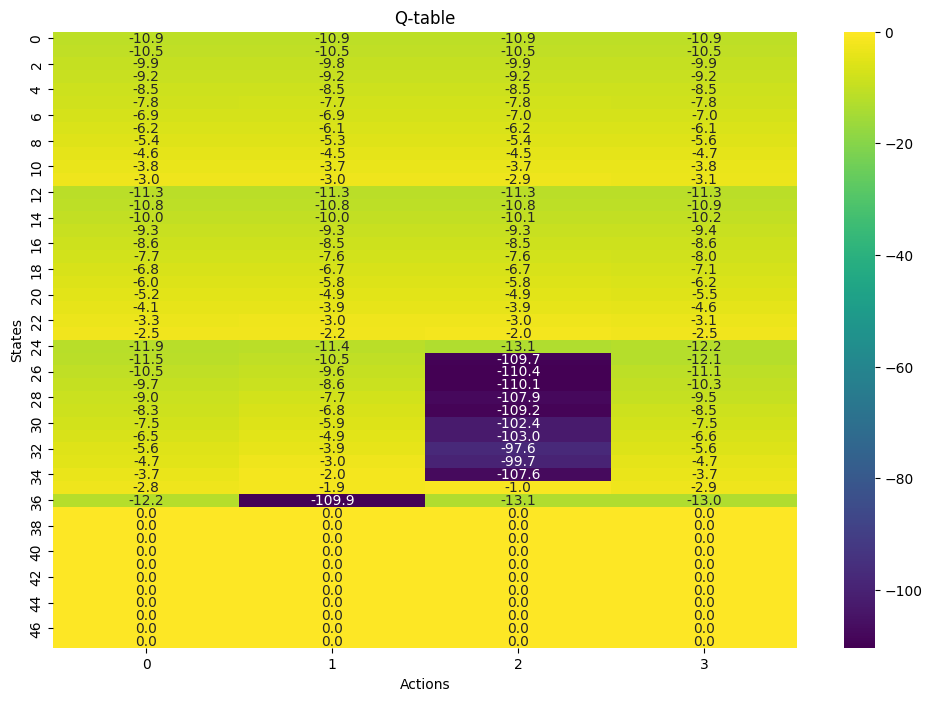

In [15]:
plot_Q(Q)

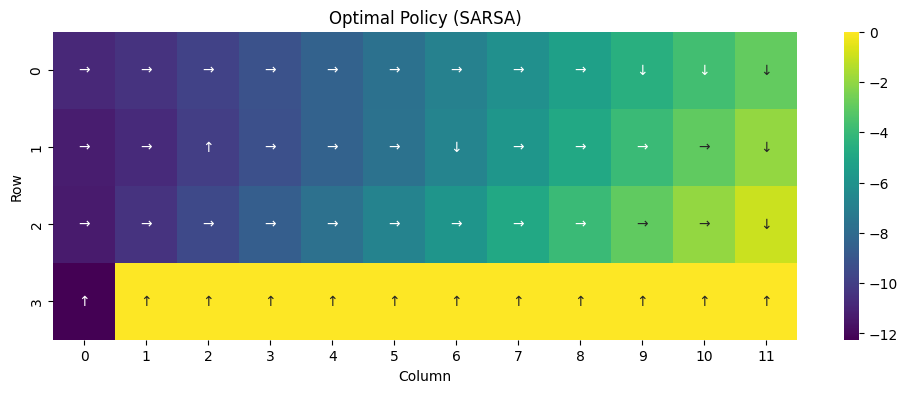

In [16]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


Episode 996 SARSA: total reward = -17
Episode 997 SARSA: total reward = -15
Episode 998 SARSA: total reward = -21
Episode 999 SARSA: total reward = -17
Episode 1000 SARSA: total reward = -17
Episode 996 Q-learning: total reward = -113
Episode 997 Q-learning: total reward = -17
Episode 998 Q-learning: total reward = -13
Episode 999 Q-learning: total reward = -16
Episode 1000 Q-learning: total reward = -13
Episode 996 SARSA Slippery: total reward = -96
Episode 997 SARSA Slippery: total reward = -199
Episode 998 SARSA Slippery: total reward = -100
Episode 999 SARSA Slippery: total reward = -100
Episode 1000 SARSA Slippery: total reward = -100
Episode 996 Q-learning Slippery: total reward = -199
Episode 997 Q-learning Slippery: total reward = -100
Episode 998 Q-learning Slippery: total reward = -100
Episode 999 Q-learning Slippery: total reward = -100
Episode 1000 Q-learning Slippery: total reward = -46


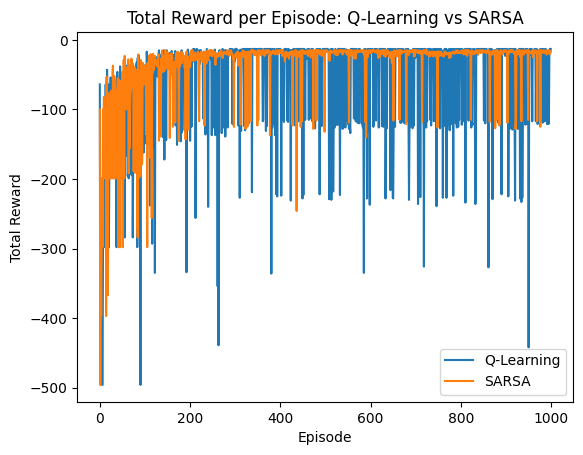

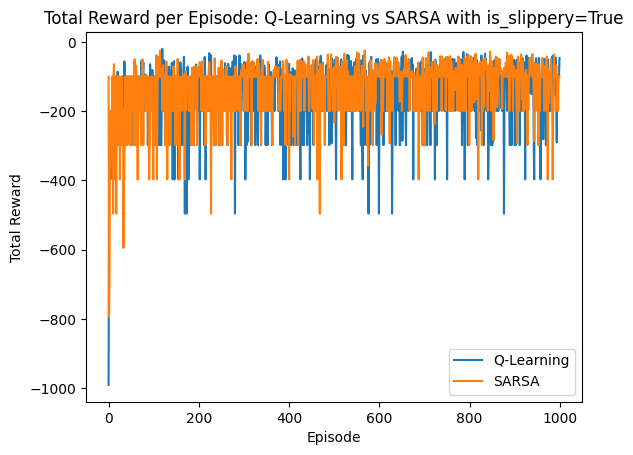

In [22]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

################################################################################
# SARSA
################################################################################

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9
reward_episodes_SARSA = []

# SARSA-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q): # Not used here, but used in Q-learning
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0


    action = epsilon_greedy_action(state, Q, epsilon,  env)



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            next_action = epsilon_greedy_action(next_state, Q, epsilon,  env)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action


    reward_episodes_SARSA.append(total_reward)
    if episode > 994:
      print(f"Episode {episode+1} SARSA: total reward = {total_reward}")

################################################################################
# Q-learning
################################################################################

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9
reward_episodes_Q = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q):
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        action = epsilon_greedy_action(state, Q, epsilon,  env)

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = greedy_action(next_state, Q)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    reward_episodes_Q.append(total_reward)
    if episode > 994:
      print(f"Episode {episode+1} Q-learning: total reward = {total_reward}")

################################################################################
# Plots
################################################################################

plt.plot(reward_episodes_Q, label="Q-Learning")
# plt.plot(reward_episodes_Q_average, label="Q-Learning Average", linestyle='--')

plt.plot(reward_episodes_SARSA, label="SARSA")
# plt.plot(reward_episodes_SARSA_average, label="SARSA Average", linestyle='--')

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode: Q-Learning vs SARSA")
plt.legend()

################################################################################
# SARSA Slippery
################################################################################

# Create the environment
env = gym.make("CliffWalking-v1", is_slippery=True, render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9
reward_episodes_SARSA_slippery = []

# SARSA-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q): # Not used here, but used in Q-learning
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0


    action = epsilon_greedy_action(state, Q, epsilon,  env)



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            next_action = epsilon_greedy_action(next_state, Q, epsilon,  env)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action


    reward_episodes_SARSA_slippery.append(total_reward)
    if episode > 994:
      print(f"Episode {episode+1} SARSA Slippery: total reward = {total_reward}")

################################################################################
# Q-learning Slippery
################################################################################

# Create the environment
env = gym.make("CliffWalking-v1", is_slippery=True, render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9
reward_episodes_Q_slippery = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q):
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        action = epsilon_greedy_action(state, Q, epsilon,  env)

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = greedy_action(next_state, Q)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    reward_episodes_Q_slippery.append(total_reward)

    if episode > 994:
      print(f"Episode {episode+1} Q-learning Slippery: total reward = {total_reward}")

################################################################################
# Plots Slippery
################################################################################

plt.figure()
plt.plot(reward_episodes_Q_slippery, label="Q-Learning")
plt.plot(reward_episodes_SARSA_slippery, label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode: Q-Learning vs SARSA with is_slippery=True")
plt.legend()


1. From the first plot, I can see that Q-Learning shows more variability, obtaining rewards smaller than '-200' much more often than the SARSA algorithm. However, both algorithms converge to a similar final value.

2. After setting is_slippery=True, both algorithms seem to perform similarly. Based on the plot, it is difficult to determine if one consistently outperforms the other.

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [24]:
!pip install gym_simplegrid

In [28]:
import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='ansi')
obs, info = env.reset(options=options)
done = env.unwrapped.done

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

# SARSA-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() <= epsilon:
        return int(np.argmax(Q[state]))
    else:
        return env.action_space.sample()

def greedy_action(state, Q): # Not used here, but used in Q-learning
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset(options=options)
    terminated = False
    truncated = False
    total_reward = 0


    action = epsilon_greedy_action(state, Q, epsilon,  env)



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            next_action = epsilon_greedy_action(next_state, Q, epsilon,  env)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action


    print(f"Episode {episode+1}: total reward = {total_reward}")



Episode 1: total reward = -13.0
Episode 2: total reward = -32.0
Episode 3: total reward = -1.0
Episode 4: total reward = -5.0
Episode 5: total reward = -28.0
Episode 6: total reward = -13.0
Episode 7: total reward = -13.0
Episode 8: total reward = -3.0
Episode 9: total reward = 0.0
Episode 10: total reward = -10.0
Episode 11: total reward = -23.0
Episode 12: total reward = -5.0
Episode 13: total reward = -4.0
Episode 14: total reward = -4.0
Episode 15: total reward = -25.0
Episode 16: total reward = -40.0
Episode 17: total reward = -1.0
Episode 18: total reward = -20.0
Episode 19: total reward = -2.0
Episode 20: total reward = -3.0
Episode 21: total reward = -7.0
Episode 22: total reward = -12.0
Episode 23: total reward = -17.0
Episode 24: total reward = -18.0
Episode 25: total reward = -30.0
Episode 26: total reward = -1.0
Episode 27: total reward = -2.0
Episode 28: total reward = -12.0
Episode 29: total reward = -26.0
Episode 30: total reward = -23.0
Episode 31: total reward = -17.0


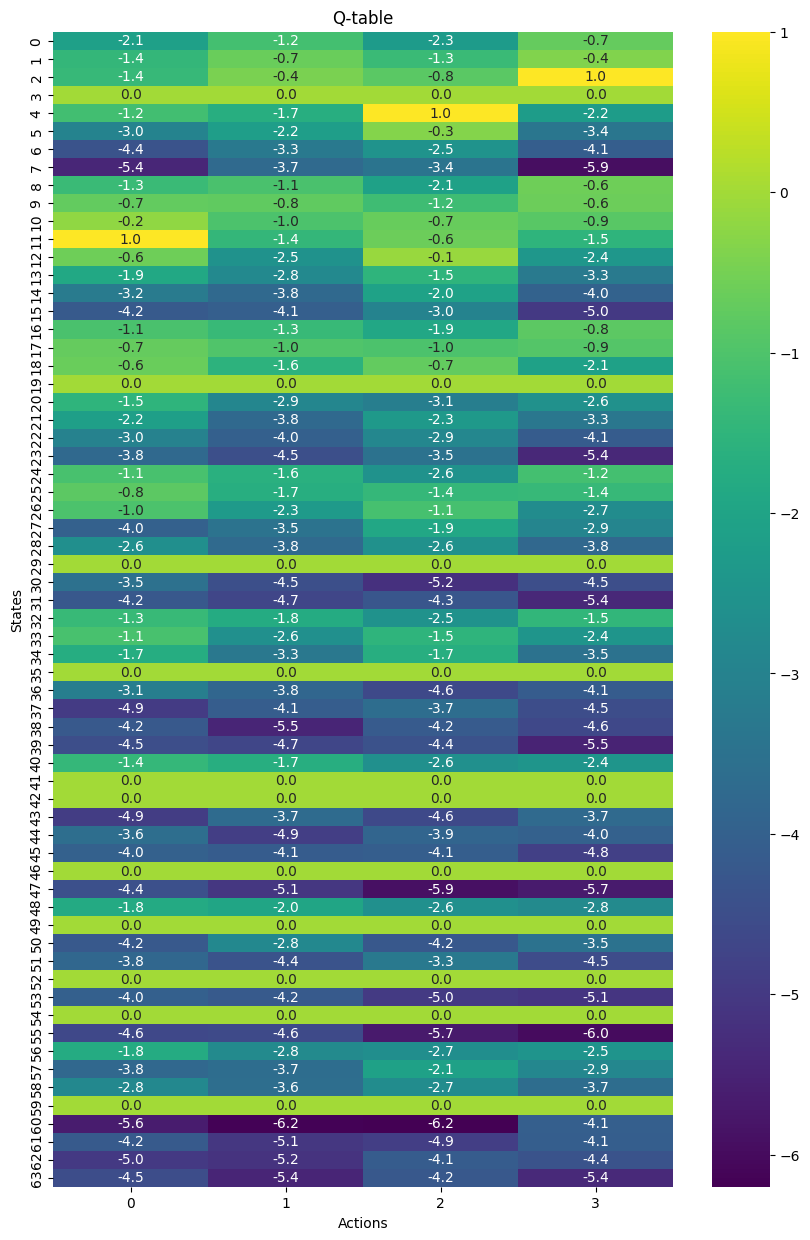

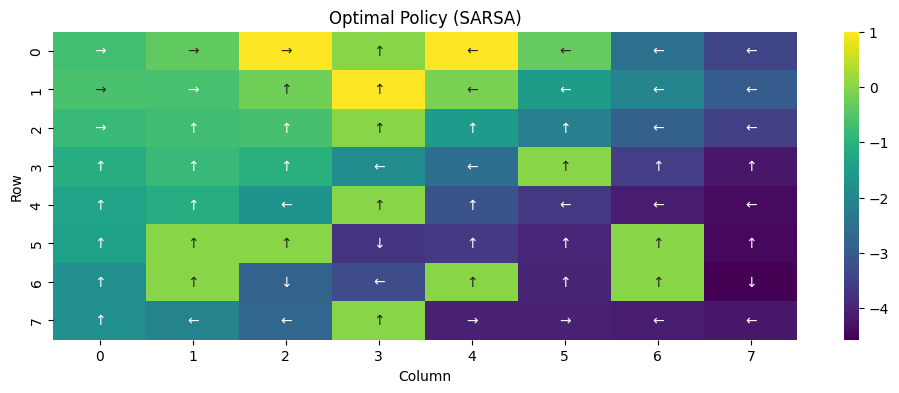

In [29]:
def plot_Q(Q):
  plt.figure(figsize=(10, 15))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((8, 8, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: down, 2: left, 3: right)
  action_arrows = {0: "↑", 1: "↓", 2: "←", 3: "→"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()


plot_policy(Q, "SARSA")

I noticed that the policy learnt in this 1000 episodes is really sensitive to the value of epsilon used. If the epsilon is big (around 0.9), then the optimal trajectory is learn in around 20 episodes, but most of the space remains unexplored. When the epsilon is smaller (around 0.1), most of the space is explored but takes more episodes (case shown in the plots).